# UV VIS Spectroscopy


In [1]:
#Import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style
plt.style.use('fivethirtyeight')
# import tikzplotlib
from scipy.optimize import curve_fit

## RC Parameters

In [2]:
plt.rcParams['lines.linewidth'] = 2

## Funktionen

In [3]:
def wavelength_to_energy(wavelength_nm):
    # Convert wavelength from nm to meters
    wavelength_m = wavelength_nm * 1e-9

    # Calculate the speed of light in meters per second
    speed_of_light = 299792458  # meters per second

    # Calculate the energy in joules using the formula E = h * c / λ,
    # where h is the Planck's constant (6.62607015e-34 J*s)
    # and c is the speed of light
    energy_joules = 6.62607015e-34 * speed_of_light / wavelength_m

    # Convert energy from joules to electron volts (eV)
    energy_ev = energy_joules / 1.602176634e-19

    return energy_ev

def gaussian(x, A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def SoS1(x, A1, mu1, sig1, A2, mu2):
    return gaussian(x, A1, mu1, sig1) + gaussian(x, A2, mu2, sig1)

## Daten einlesen

In [4]:
df = pd.read_csv('abs.csv', header = [0,1])
df['eV'] = wavelength_to_energy(df.iloc[:,0])
df

,toluene,Unnamed: 1_level_0,sample14,Unnamed: 3_level_0,benzonitrile,Unnamed: 5_level_0,sample13,Unnamed: 7_level_0,sample15,Unnamed: 9_level_0,Unnamed: 10_level_0,eV
,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Unnamed: 10_level_1,
0,800,0.044102,800,0.001488,800,0.045439,800,-0.011290,800,-0.024183,NaN,1.549802
1,799,0.045645,799,0.003400,799,0.046010,799,-0.009754,799,-0.026257,NaN,1.551742
2,798,0.045992,798,0.006005,798,0.045076,798,-0.008138,798,-0.027490,NaN,1.553687
3,797,0.044917,797,0.003755,797,0.043213,797,-0.004876,797,-0.025832,NaN,1.555636
4,796,0.045206,796,0.003967,796,0.046153,796,-0.004328,796,-0.029604,NaN,1.557590
...,...,...,...,...,...,...,...,...,...,...,...,...
496,304,0.073125,304,0.025425,304,0.630754,304,-0.176905,304,-0.079274,NaN,4.078428
497,303,0.074541,303,0.023657,303,0.643489,303,-0.182187,303,-0.081490,NaN,4.091888
498,302,0.077087,302,0.025028,302,0.662530,302,-0.193376,302,-0.087340,NaN,4.105437


## Plots


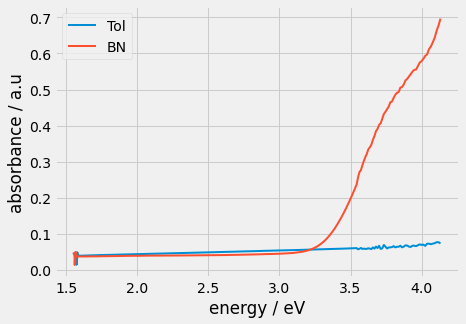

In [5]:
# Solvents
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
plt.plot(df['eV'], df.iloc[:,1], marker = None, label = 'Tol')
plt.plot(df['eV'], df.iloc[:,5], marker = None, label = 'BN')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')
plt.legend()

plt.tight_layout()


plt.show()


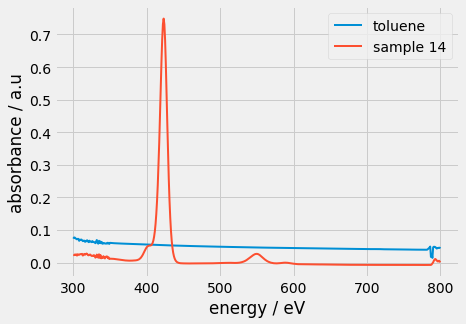

In [6]:
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
plt.plot(df.iloc[:,0], df.iloc[:,1], marker = None, label = 'toluene')
plt.plot(df.iloc[:,0], df.iloc[:,3], marker = None, label = 'sample 14')



plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')
plt.legend()

plt.tight_layout()

plt.show()


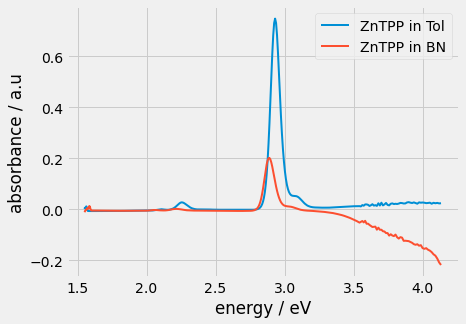

In [7]:
# ZnTPP different solvent
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df['eV'], df.iloc[:,1], marker = None, label = 'Tol')
plt.plot(df['eV'], df.iloc[:,3], marker = None, label = 'ZnTPP in Tol')
plt.plot(df['eV'], df.iloc[:,7], marker = None, label = 'ZnTPP in BN')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')
plt.legend()

plt.tight_layout()


plt.show()


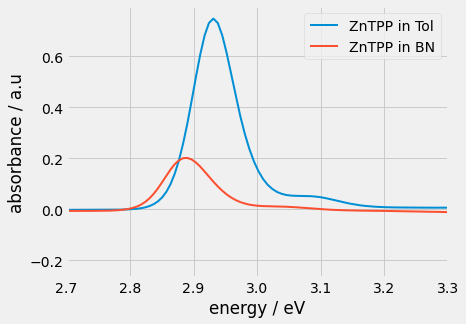

In [8]:
# ZnTPP different solvent zoom
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df['eV'], df.iloc[:,1], marker = None, label = 'Tol')
plt.plot(df['eV'], df.iloc[:,3], marker = None, label = 'ZnTPP in Tol')
plt.plot(df['eV'], df.iloc[:,7], marker = None, label = 'ZnTPP in BN')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')
plt.legend()

plt.xlim(2.7,3.3)

plt.tight_layout()


plt.show()


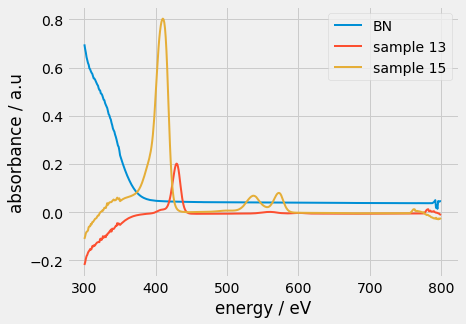

In [9]:

breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
plt.plot(df.iloc[:,0], df.iloc[:,5], marker = None, label = 'BN')
plt.plot(df.iloc[:,0], df.iloc[:,7], marker = None, label = 'sample 13')
plt.plot(df.iloc[:,0], df.iloc[:,9], marker = None, label = 'sample 15')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')

#plt.yscale('log')
plt.legend()

plt.tight_layout()

plt.show()

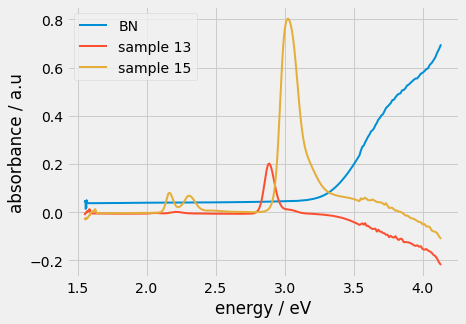

In [10]:

breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
plt.plot(df['eV'], df.iloc[:,5], marker = None, label = 'BN')
plt.plot(df['eV'], df.iloc[:,7], marker = None, label = 'sample 13')
plt.plot(df['eV'], df.iloc[:,9], marker = None, label = 'sample 15')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')

#plt.yscale('log')
plt.legend()

plt.tight_layout()

plt.show()

## Fit peaks

### Different solvent

In [11]:
parZnTPPinTol, varZnTPPinTol = curve_fit(gaussian, df.iloc[350:385,11], df.iloc[350:385,3])  # Fit on limited rage between 2.75 and 2.95 eV
#parZnTPPinTol_2, varZnTPPinTol_2 = curve_fit(SoS1, df.iloc[350:420,11], df.iloc[350:420,3])  # Fit on limited rage between 2.75 and 2.95 eV
parZnTPPinBN, varZnTPPinBN = curve_fit(gaussian, df.iloc[340:400,11], df.iloc[340:400,7])

#Making Plots
fitZnTPPinTol = gaussian(df['eV'], parZnTPPinTol[0], parZnTPPinTol[1], parZnTPPinTol[2])
#fitZnTPPinTol_2 = SoS1(df['eV'], parZnTPPinTol_2[0], parZnTPPinTol_2[1], parZnTPPinTol_2[2], parZnTPPinTol_2[3], parZnTPPinTol_2[4])
fitZnTPPinBN = gaussian(df['eV'], parZnTPPinBN[0], parZnTPPinBN[1], parZnTPPinBN[2])


# print(df.iloc[320,11])
# print(df.iloc[400,11])
print('Der Peak in BN: ' +str(parZnTPPinBN[1]) + "(" + str(varZnTPPinBN[1,1])+")")
print('Der Peak in Tol: ' +str(parZnTPPinTol[1])+ "(" + str(varZnTPPinTol[1,1])+")")

Der Peak in BN: 2.891726047275748(4.0537869706327715e-07)
Der Peak in Tol: 2.9322979338247643(3.0668593074356384e-08)


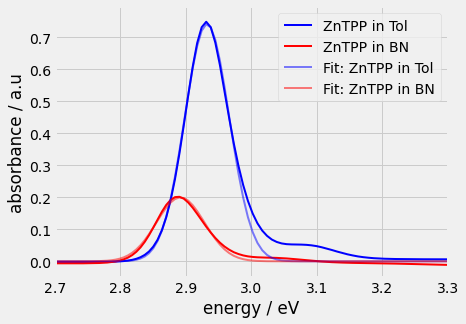

In [22]:
# ZnTPP different solvent zoom
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df['eV'], df.iloc[:,1], marker = None, label = 'Tol')
plt.plot(df['eV'], df.iloc[:,3], marker = None, color = 'b', label = 'ZnTPP in Tol')
plt.plot(df['eV'], df.iloc[:,7], marker = None, color = 'r', label = 'ZnTPP in BN')
plt.plot(df['eV'], fitZnTPPinTol, marker = None,color = 'b', alpha = 0.5, label = 'Fit: ZnTPP in Tol')
plt.plot(df['eV'], fitZnTPPinBN, marker = None, color = 'r', alpha = 0.5, label = 'Fit: ZnTPP in BN')
#plt.plot(df['eV'], fitZnTPPinTol_2, marker = None, label = 'Fit2: ZnTPP in Tol')

plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')
plt.legend()

plt.xlim(2.7,3.3)
plt.ylim(-0.05,)

plt.tight_layout()


plt.show()

### Different materials

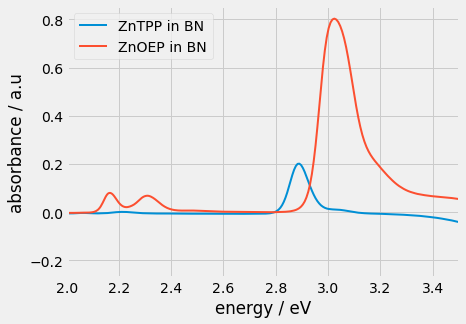

In [13]:
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df.iloc[:,11], df.iloc[:,5], marker = None, label = 'BN')
plt.plot(df.iloc[:,11], df.iloc[:,7], marker = None, label = 'ZnTPP in BN')
plt.plot(df.iloc[:,11], df.iloc[:,9], marker = None, label = 'ZnOEP in BN')


plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')

plt.xlim(2,3.5)

#plt.yscale('log')
plt.legend()

plt.tight_layout()

plt.show()

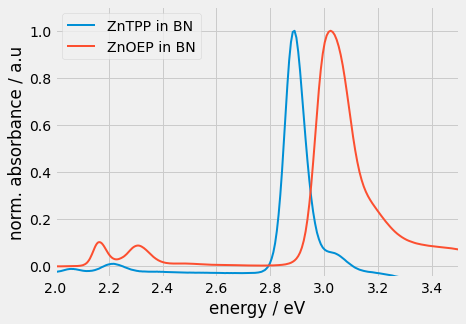

In [14]:
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df.iloc[:,11], df.iloc[:,5], marker = None, label = 'BN')
plt.plot(df.iloc[:,11], df.iloc[:,7]/max(df.iloc[:,7]), marker = None, label = 'ZnTPP in BN')
plt.plot(df.iloc[:,11], df.iloc[:,9]/max(df.iloc[:,9]), marker = None, label = 'ZnOEP in BN')


plt.xlabel('energy / eV')
plt.ylabel('norm. absorbance / a.u')

plt.xlim(2,3.5)
plt.ylim(-0.05,)
#plt.yscale('log')
plt.legend()

plt.tight_layout()

#plt.savefig('ZnTPPZnOEP.svg')
plt.show()

In [15]:
# Fit peak position 

# plt.plot(df.iloc[360:400, 9])

parZnTPPinBN2, varZnTPPinBN2 = curve_fit(gaussian, df.iloc[350:380,11], df.iloc[350:380, 7], p0= [0.2, 2.85, 0.1])  # Fit on limited rage between 2.75 and 2.95 eV
parZnOEPinBN, varZnOEPinBN = curve_fit(gaussian, df.iloc[360:400,11], df.iloc[360:400, 9], p0= [0.2, 3.1, 0.1])


#Making Plots
fitZnTPPinBN_2 = gaussian(df['eV'], parZnTPPinBN2[0], parZnTPPinBN2[1], parZnTPPinBN2[2])
fitZnOEPinBN = gaussian(df['eV'], parZnOEPinBN[0], parZnOEPinBN[1], parZnOEPinBN[2])

# print(df.iloc[320,11])
# print(df.iloc[400,11])
print('Der Peak in ZnTPP: ' +str(parZnTPPinBN2[1]) + "(" + str(varZnTPPinBN2[1,1])+")")
print('Der Peak in ZnOEP: ' +str(parZnOEPinBN[1])+ "(" + str(varZnOEPinBN[1,1])+")")

Der Peak in ZnTPP: 2.8907734092561053(1.9502837307170962e-07)
Der Peak in ZnOEP: 3.0324985107493925(1.1901171712492485e-06)


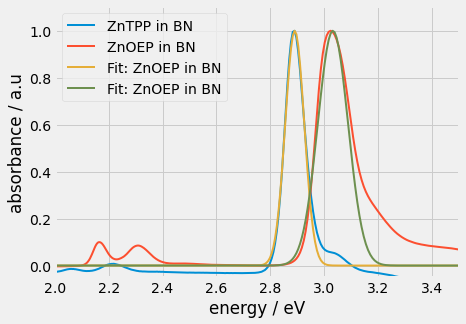

In [16]:
breit = 17/2.54
plt.figure(figsize=(breit, breit/np.sqrt(2)))
#plt.plot(df.iloc[:,11], df.iloc[:,5], marker = None, label = 'BN')
plt.plot(df.iloc[:,11], df.iloc[:,7]/max(df.iloc[:,7]), marker = None, label = 'ZnTPP in BN')
plt.plot(df.iloc[:,11], df.iloc[:,9]/max(df.iloc[:,9]), marker = None, label = 'ZnOEP in BN')
plt.plot(df.iloc[:,11], fitZnTPPinBN_2/max(fitZnTPPinBN_2), marker = None, label = 'Fit: ZnOEP in BN')
plt.plot(df.iloc[:,11], fitZnOEPinBN/max(fitZnOEPinBN), marker = None, label = 'Fit: ZnOEP in BN')

plt.xlabel('energy / eV')
plt.ylabel('absorbance / a.u')

plt.xlim(2,3.5)
plt.ylim(-0.05,)
#plt.yscale('log')
plt.legend()

plt.tight_layout()

plt.show()